In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
## drop month day and year
df.drop(['day','year','month'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [12]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
## independent and dependent feature
x= df.drop(['FWI'],axis=1)
y=df['FWI']

In [14]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
## Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [18]:
## feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


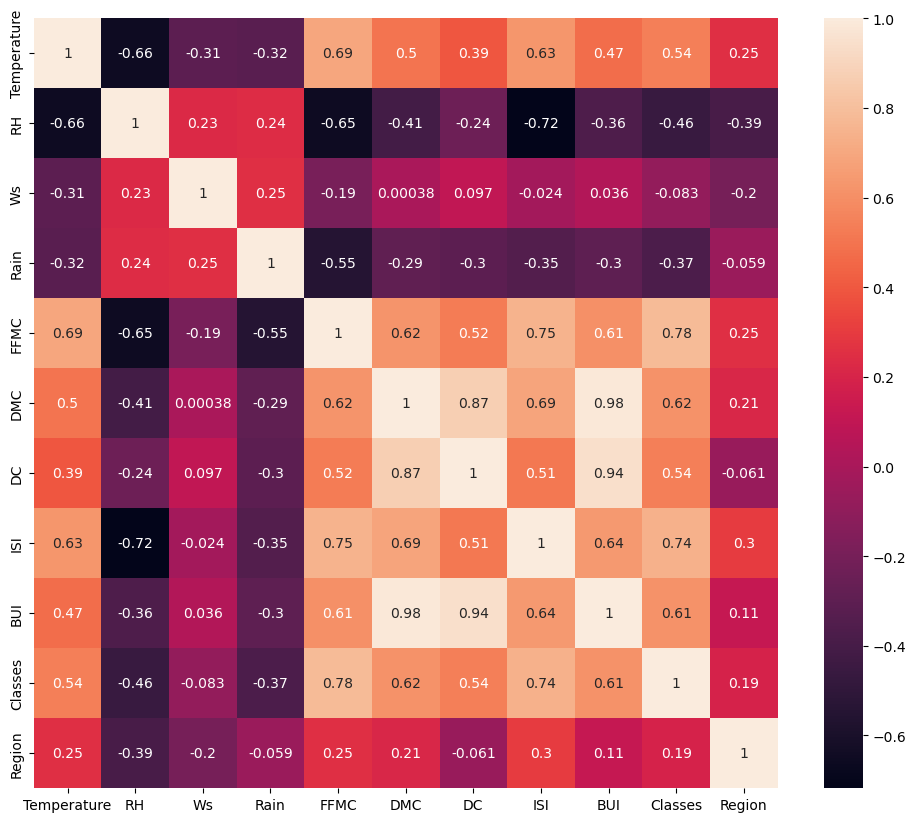

In [19]:
## check for multicollinerity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [21]:
## threshold -- domain expertise
corr_features=correlation(x_train,0.75)

In [22]:
print(corr_features)

{'DC', 'Classes', 'ISI', 'BUI'}


In [23]:
## drop features when correlation is more than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape


((182, 7), (61, 7))

## feature scaling and standardization

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [25]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.12805583,
        -0.88272888, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -1.21758569,
        -0.86687565,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  1.15703067,
         0.61540157,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -2.20933724,
        -1.06504105, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.73099656,
         0.37760309,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -1.33631651,
        -1.01748135, -0.98907071]], shape=(182, 7))

## box plots to understand the effect of standard scaler

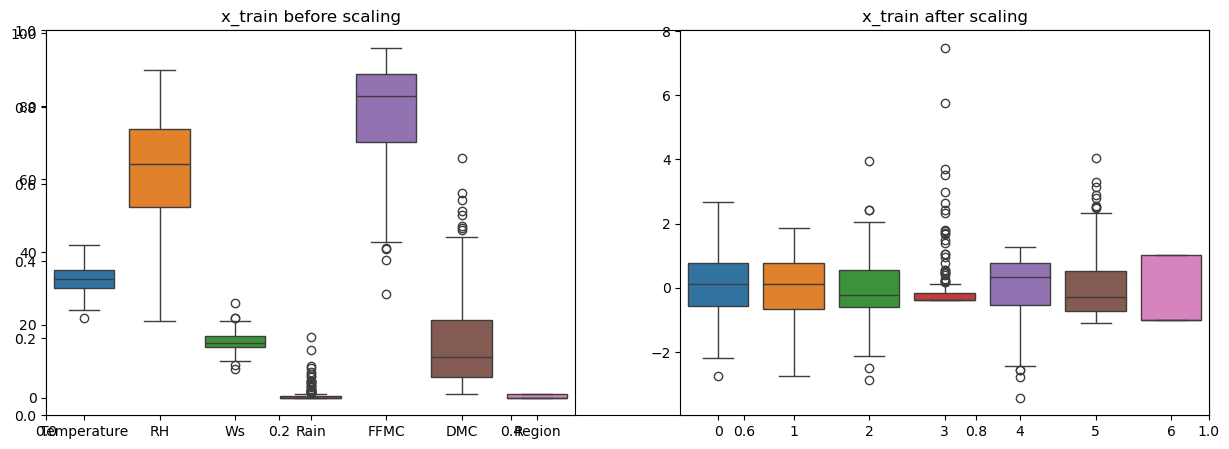

In [26]:
plt.subplots(figsize=(15,5))
plt.subplot(1 , 2, 1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')
plt.subplot(1 , 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')
plt.show()

## linear regression model

Mean absolute error 2.2301202183547106
r2_score 0.7982160136811769


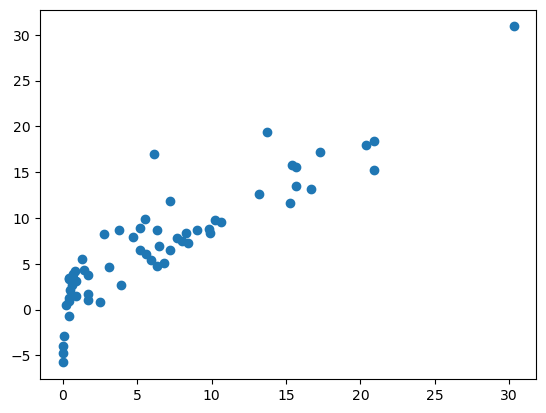

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)
plt.show()

## lasso regression

Mean absolute error 2.458002641426298
r2_score 0.7748202345729962


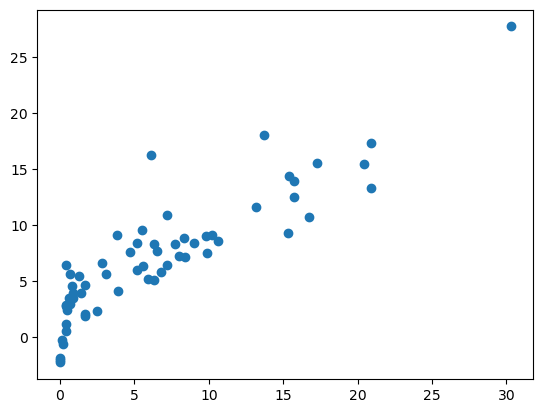

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)
plt.show()

## Ridge regression model

Mean absolute error 2.2284537007051735
r2_score 0.7985255932362753


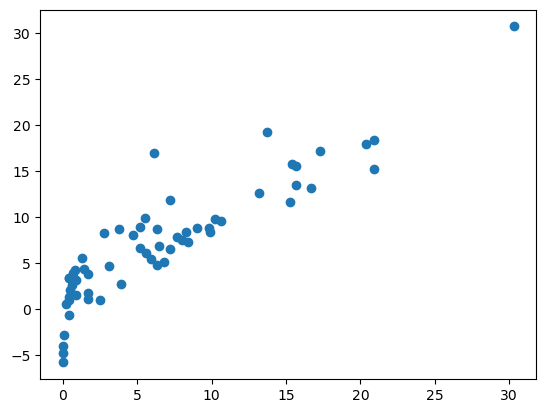

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)
plt.show()

## Cross validation lasso

In [30]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [31]:
lassocv.predict(x_test_scaled)

array([ 7.16470985,  6.38013211,  2.290172  ,  8.95146955,  7.35256482,
        4.41712203,  1.42860539, 11.80918758,  1.89751557,  7.61202097,
        2.91052463, 17.01543681,  9.13851233, 17.0102822 , 17.20089308,
        5.80975007,  4.47969658, -4.50787972,  5.16126213,  5.06160623,
        1.55044799, -0.69926135,  5.24831825,  0.92366549, 14.92133326,
        7.9957022 ,  6.01588933,  9.46323792, -4.79740019,  8.28848611,
        4.72397638,  1.69642238,  9.24114869, 15.09803505,  4.01843562,
        3.39805549,  1.10163676,  9.96117423, -2.30851347, -0.08990333,
        8.40996614,  3.92976291,  8.51330206, -4.0713388 , 13.48720162,
        7.31819162,  8.13742105,  2.64467133, 12.52322873,  3.02900422,
       30.48917752,  8.89253772, 12.74855295, 18.15707375, 10.82478596,
       19.03581735,  4.47841882,  8.82953114,  3.27208259, 15.67503279,
        6.52512458])

In [32]:
lassocv.alpha_

np.float64(0.15566444891433542)

In [33]:
lassocv.alphas_

array([6.73834239, 6.28420067, 5.86066658, 5.46567726, 5.09730891,
       4.75376735, 4.43337934, 4.13458441, 3.85592726, 3.59605067,
       3.35368889, 3.12766148, 2.91686756, 2.72028045, 2.53694266,
       2.36596121, 2.20650334, 2.0577924 , 1.91910408, 1.78976289,
       1.66913886, 1.55664449, 1.45173186, 1.35388999, 1.26264234,
       1.17754447, 1.09818191, 1.02416813, 0.95514262, 0.89076921,
       0.83073434, 0.77474563, 0.72253037, 0.67383424, 0.62842007,
       0.58606666, 0.54656773, 0.50973089, 0.47537673, 0.44333793,
       0.41345844, 0.38559273, 0.35960507, 0.33536889, 0.31276615,
       0.29168676, 0.27202805, 0.25369427, 0.23659612, 0.22065033,
       0.20577924, 0.19191041, 0.17897629, 0.16691389, 0.15566445,
       0.14517319, 0.135389  , 0.12626423, 0.11775445, 0.10981819,
       0.10241681, 0.09551426, 0.08907692, 0.08307343, 0.07747456,
       0.07225304, 0.06738342, 0.06284201, 0.05860667, 0.05465677,
       0.05097309, 0.04753767, 0.04433379, 0.04134584, 0.03855

In [34]:
lassocv.mse_path_

array([[50.8129891 , 65.39074075, 52.50462315, 77.90299066, 41.59867037],
       [46.42020879, 61.07250415, 47.76817751, 77.90299066, 36.54285826],
       [42.55461285, 55.23199904, 43.60446554, 72.6661576 , 32.24150621],
       [39.15056645, 50.12622899, 39.94186658, 64.90148444, 28.58987932],
       [36.15077949, 45.66124608, 36.71788789, 58.20804626, 25.49732026],
       [33.50523339, 41.75522116, 33.87798925, 52.44227801, 22.88538634],
       [31.17024684, 38.33687326, 31.3745598 , 47.47958614, 20.6862311 ],
       [29.10766237, 35.34410314, 29.16602717, 43.21185916, 18.84119861],
       [27.28413797, 32.72280424, 27.21608202, 39.54530381, 17.29960259],
       [25.67053035, 30.39740594, 25.49300269, 36.39856409, 16.01766611],
       [24.24135772, 28.20714762, 23.96906725, 33.57860399, 14.72628033],
       [22.75570649, 26.19396431, 22.6200414 , 31.1093024 , 13.59363549],
       [21.22011718, 24.28124601, 21.1911882 , 28.97094537, 12.64636076],
       [19.63025272, 22.59692496, 19.4

Mean absolute error 2.2912996570322512
r2_score 0.7939546227862174


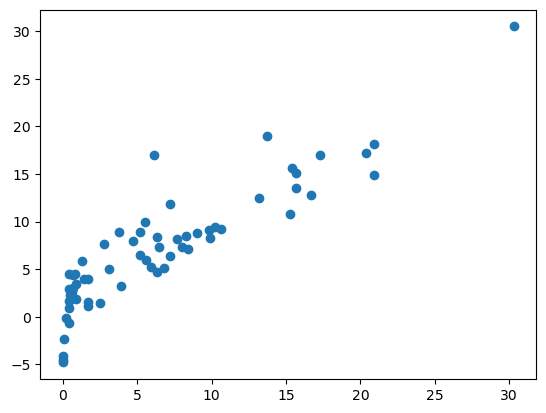

In [35]:
y_pred=lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.show()

Mean absolute error 2.2284537007051735
r2_score 0.7985255932362753


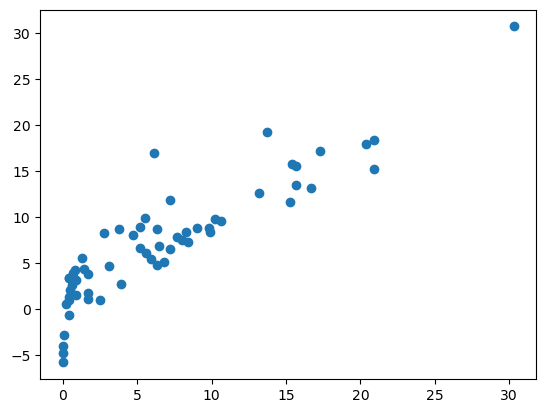

In [36]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.show()

In [37]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [38]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elasticnet Regression

combine both of them

Mean absolute error 2.8281228552037088
r2_score 0.7240370520781504


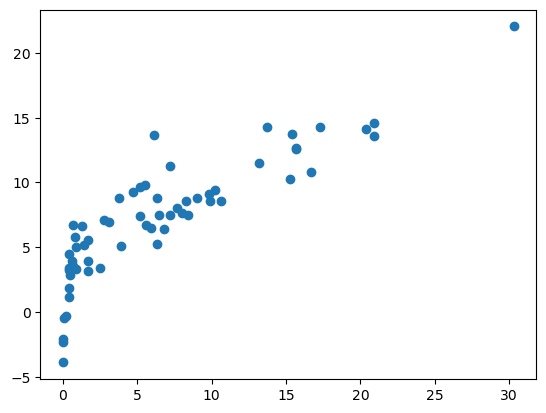

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 2.2312850251417156
r2_score 0.7987454320510228


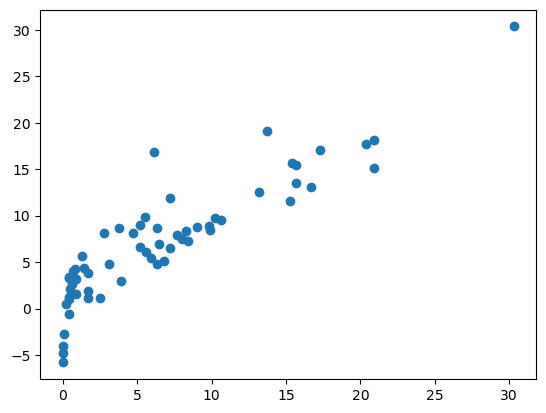

In [40]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_pred=elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.show()

In [41]:
elasticcv.alphas_

array([13.47668479, 12.56840134, 11.72133315, 10.93135453, 10.19461782,
        9.5075347 ,  8.86675868,  8.26916882,  7.71185452,  7.19210133,
        6.70737777,  6.25532296,  5.83373513,  5.44056091,  5.07388531,
        4.73192242,  4.41300669,  4.11558481,  3.83820817,  3.57952578,
        3.33827772,  3.11328898,  2.90346372,  2.70777998,  2.52528468,
        2.35508894,  2.19636383,  2.04833626,  1.91028525,  1.78153842,
        1.66146869,  1.54949126,  1.44506074,  1.34766848,  1.25684013,
        1.17213332,  1.09313545,  1.01946178,  0.95075347,  0.88667587,
        0.82691688,  0.77118545,  0.71921013,  0.67073778,  0.6255323 ,
        0.58337351,  0.54405609,  0.50738853,  0.47319224,  0.44130067,
        0.41155848,  0.38382082,  0.35795258,  0.33382777,  0.3113289 ,
        0.29034637,  0.270778  ,  0.25252847,  0.23550889,  0.21963638,
        0.20483363,  0.19102852,  0.17815384,  0.16614687,  0.15494913,
        0.14450607,  0.13476685,  0.12568401,  0.11721333,  0.10

## Pickle the machine learning model ,preprocessing model standardscaler


In [42]:
scaler

StandardScaler()

In [43]:
ridge

Ridge()

In [44]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))